# Under Sampling and Over Sampling - Utkarsh Gaikwad

In [1]:
import numpy as np
import pandas as pd

# Random Seed 
np.random.seed(123)

# Create dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(class_0_ratio*n_samples)
n_class_1 = n_samples - n_class_0

In [2]:
(n_class_0, n_class_1)

(900, 100)

In [3]:
# Create dataframe with imbalanced dataset
class_0 = pd.DataFrame({
    'feature1':np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature2':np.random.normal(loc=0, scale=1, size=n_class_0),
    'target':[0]*n_class_0
})

class_1 = pd.DataFrame({
    'feature1':np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature2':np.random.normal(loc=2, scale=1, size=n_class_1),
    'target':[1]*n_class_1
})

In [4]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [5]:
df.head()

,feature1,feature2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [6]:
df.tail()

,feature1,feature2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [7]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

<AxesSubplot: >

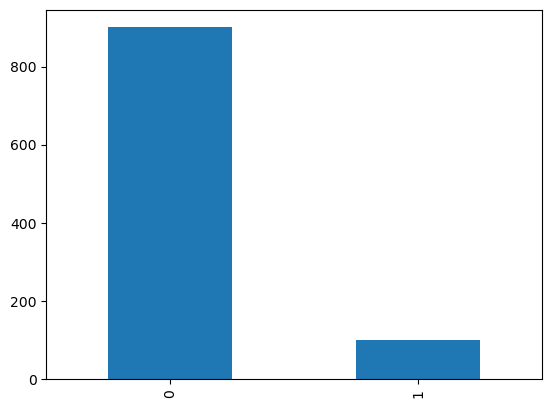

In [8]:
df['target'].value_counts().plot(kind='bar')

## Upsampling (oversampling)

In [9]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [10]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, replace=True ,
                                 n_samples = len(df_majority) ,
                                 random_state=42)

In [11]:
df_minority_upsampled.shape

(900, 3)

In [12]:
df_minority_upsampled.head()

,feature1,feature2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [13]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [14]:
df_upsampled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

<AxesSubplot: >

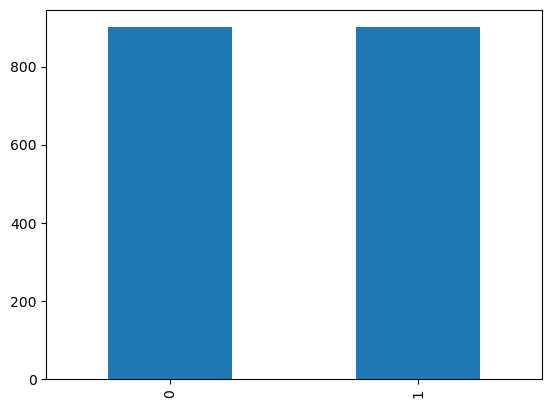

In [15]:
df_upsampled['target'].value_counts().plot(kind='bar')

In [16]:
df_upsampled.shape

(1800, 3)

## Downsampling or Undersampling

In [17]:
import numpy as np
import pandas as pd

def create_sample_data(n_samples, class_0_ratio,random_seed): 
    np.random.seed(random_seed)

    # Create dataframe with two classes
    n_class_0 = int(class_0_ratio*n_samples)
    n_class_1 = n_samples - n_class_0

    # Create dataframe with imbalanced dataset
    class_0 = pd.DataFrame({
                'feature1':np.random.normal(loc=0, scale=1, size=n_class_0),
                'feature2':np.random.normal(loc=0, scale=1, size=n_class_0),
                'target':[0]*n_class_0
            })

    class_1 = pd.DataFrame({
                'feature1':np.random.normal(loc=2, scale=1, size=n_class_1),
                'feature2':np.random.normal(loc=2, scale=1, size=n_class_1),
                'target':[1]*n_class_1
            })

    df = pd.concat([class_0, class_1]).reset_index(drop=True)
    
    return df

In [18]:
df =  create_sample_data(n_samples = 1000, class_0_ratio = 0.8, random_seed=456)

In [19]:
df.head()

,feature1,feature2,target
0,-0.668129,0.794968,0
1,-0.498210,-0.474483,0
2,0.618576,-0.049047,0
3,0.568692,-1.453273,0
4,1.350509,-1.073436,0


In [20]:
df.tail()

,feature1,feature2,target
995,1.835936,1.426478,1
996,3.293568,3.739478,1
997,1.254732,2.327192,1
998,3.058837,2.020510,1
999,2.089371,1.436142,1


In [21]:
df['target'].value_counts()

0    800
1    200
Name: target, dtype: int64

<AxesSubplot: >

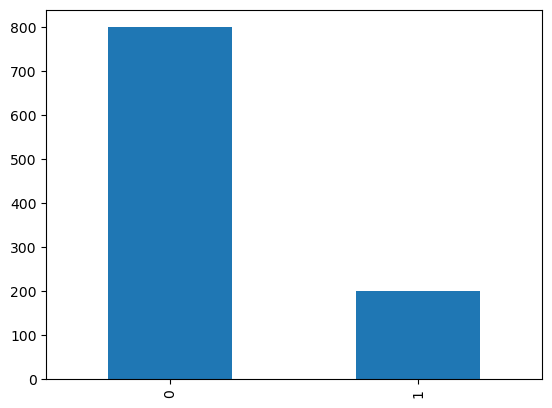

In [22]:
df['target'].value_counts().plot(kind='bar')

In [23]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [24]:
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority, replace=False ,
                                   n_samples = len(df_minority) ,
                                   random_state=42)

In [25]:
df_majority_downsampled.shape

(200, 3)

In [26]:
df_majority_downsampled.head()

,feature1,feature2,target
696,-0.435319,0.128898,0
667,0.736909,1.041910,0
63,-0.066552,-0.813267,0
533,0.248017,0.876906,0
66,0.671070,1.510741,0


In [27]:
df_downsampled = pd.concat([df_majority_downsampled,df_minority]).reset_index(drop=True)

In [28]:
df_downsampled.shape

(400, 3)

In [29]:
df_downsampled['target'].value_counts()

0    200
1    200
Name: target, dtype: int64

<AxesSubplot: >

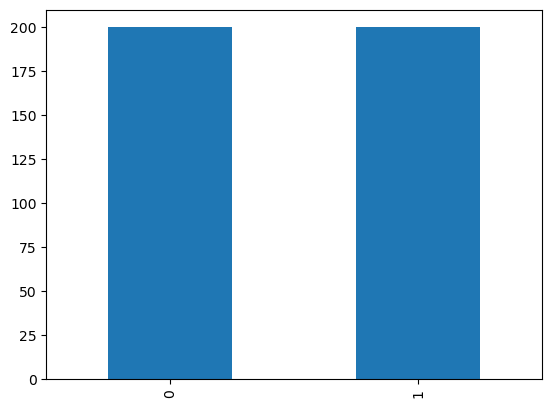

In [30]:
df_downsampled['target'].value_counts().plot(kind='bar')

## Overampling with imblearn

In [31]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [32]:
df = create_sample_data(1000,0.91,342)

In [33]:
df.head()

,feature1,feature2,target
0,0.088148,-1.349911,0
1,-0.526802,1.049446,0
2,-0.190451,-0.235173,0
3,0.461833,1.252787,0
4,-1.975934,-0.384445,0


In [34]:
df.shape

(1000, 3)

In [35]:
# seperating X and Y
X = df.drop(labels=['target'],axis=1)
Y = df[['target']]

In [36]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=56)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [38]:
X_resampled.shape

(1820, 2)

In [39]:
Y_resampled.shape

(1820, 1)

In [40]:
Y_resampled.head()

,target
0,0
1,0
2,0
3,0
4,0


<AxesSubplot: xlabel='target'>

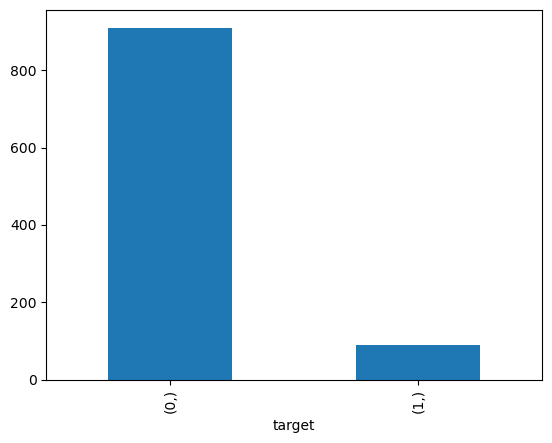

In [44]:
Y.value_counts().plot(kind='bar')

In [41]:
Y_resampled.value_counts()

target
0         910
1         910
dtype: int64

<AxesSubplot: xlabel='target'>

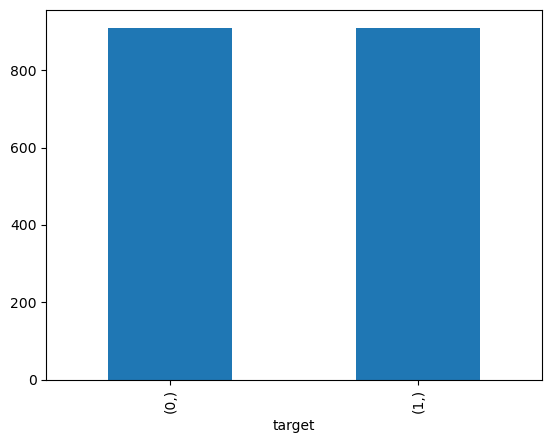

In [42]:
Y_resampled.value_counts().plot(kind='bar')

## Undersampling with imblearn

In [45]:
df = create_sample_data(1200,0.86,784)
df.head()

,feature1,feature2,target
0,0.959432,-0.616251,0
1,-0.154799,1.299732,0
2,1.116026,-0.043982,0
3,0.493407,-1.402878,0
4,0.313197,-1.061132,0


In [47]:
df.shape

(1200, 3)

In [48]:
df['target'].value_counts()

0    1032
1     168
Name: target, dtype: int64

<AxesSubplot: >

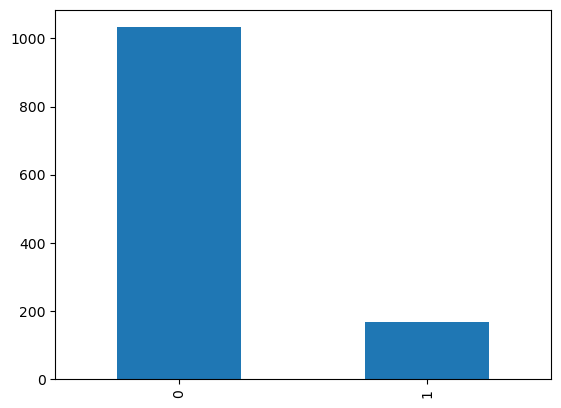

In [49]:
df['target'].value_counts().plot(kind='bar')

In [50]:
X = df.drop(labels=['target'],axis=1)
Y = df[['target']]

In [51]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=782)
X_resampled, Y_resampled = rus.fit_resample(X, Y)

In [52]:
X_resampled.shape

(336, 2)

In [53]:
Y_resampled.shape

(336, 1)

In [55]:
Y_resampled.value_counts()

target
0         168
1         168
dtype: int64

<AxesSubplot: xlabel='target'>

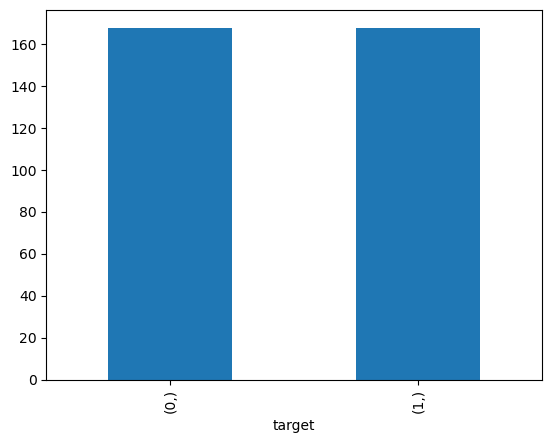

In [54]:
Y_resampled.value_counts().plot(kind='bar')